In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ipl.csv to ipl.csv


In [3]:
import io
data_ipl= pd.read_csv('ipl.csv')

In [4]:
data_ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [88]:
X=data_ipl.drop(columns=["date","total"], axis=1)
y=data_ipl.total

In [5]:
data_ipl.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [6]:
data_ipl.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [7]:
len(data_ipl.batsman.unique()) ### so ordinal encoding is not viable

411

In [8]:
cols=["batsman","bowler","striker","non-striker","mid"]
data_ipl.drop(columns=cols, inplace=True, axis=1)

In [9]:
data_ipl.tail()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
76009,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,129
76010,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,129
76011,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,129
76012,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,129
76013,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,8,19.6,47,1,129


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

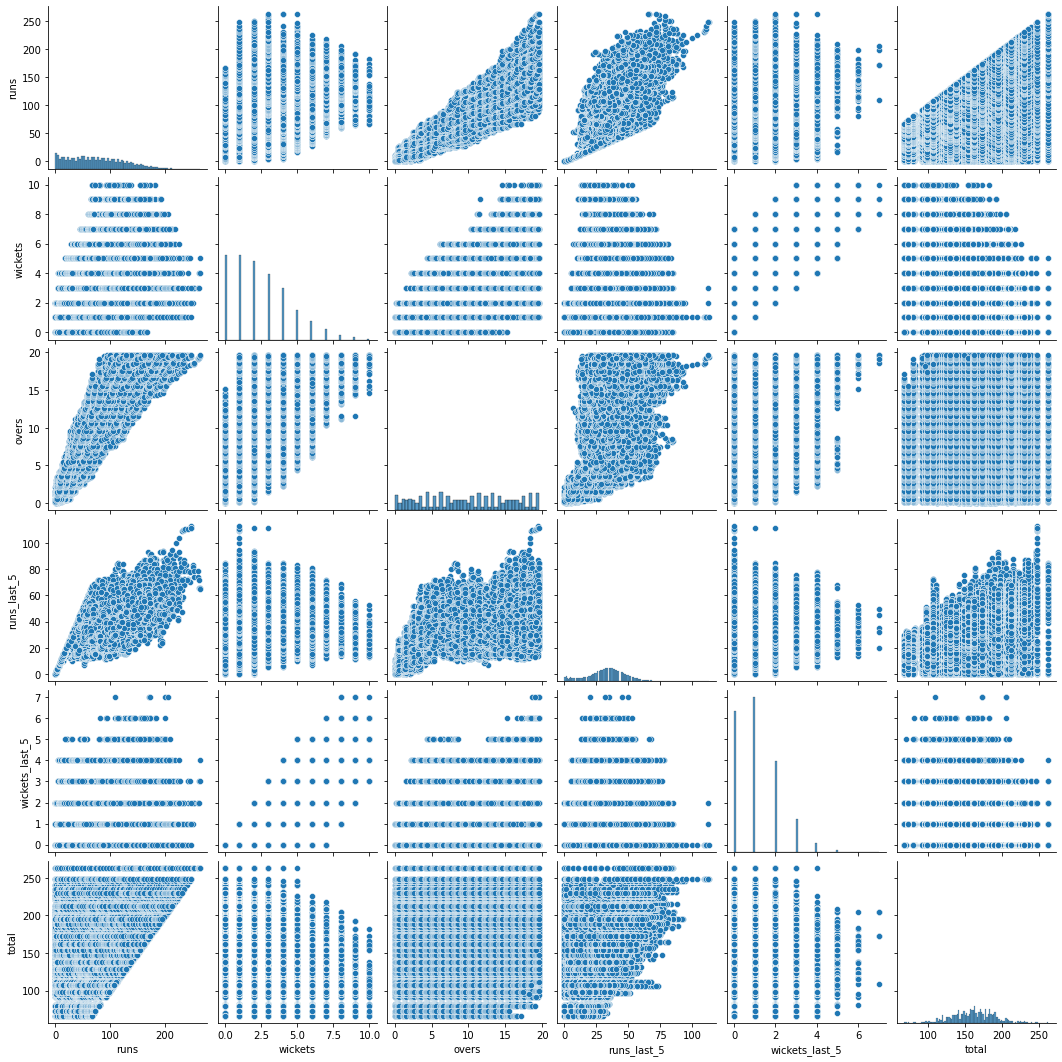

In [ ]:
sns.pairplot(data_ipl)

In [11]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [12]:
data_ipl = data_ipl[(data_ipl['bat_team'].isin(consistent_teams)) & (data_ipl['bowl_team'].isin(consistent_teams))]

In [13]:
# Removing the first 5 overs data in every match
data_ipl = data_ipl[data_ipl['overs']>=5.0]

In [14]:
#data_ipl.groupby(["venue"])["total"].sum().sort_values(ascending=False)
data_ipl.groupby(["venue"])["total"].sum().sort_values(ascending=True)


venue
De Beers Diamond Oval                                    12880
Subrata Roy Sahara Stadium                               14742
Buffalo Park                                             24784
OUTsurance Oval                                          25200
Holkar Cricket Stadium                                   32970
Barabati Stadium                                         47724
Newlands                                                 54856
Maharashtra Cricket Association Stadium                  62706
Shaheed Veer Narayan Singh International Stadium         65566
New Wanderers Stadium                                    66197
Dr DY Patil Sports Academy                               70648
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      74000
JSCA International Stadium Complex                       77644
Sharjah Cricket Stadium                                  88424
St George's Park                                         89259
Sheikh Zayed Stadium                             

In [15]:
data_ipl.groupby(["bat_team"])["total"].sum().sort_values(ascending=True)

bat_team
Sunrisers Hyderabad             584549
Delhi Daredevils                689527
Rajasthan Royals                719558
Kolkata Knight Riders           734886
Royal Challengers Bangalore     830561
Chennai Super Kings             944338
Kings XI Punjab                 959086
Mumbai Indians                 1032886
Name: total, dtype: int64

In [16]:
data_ipl.groupby(["bowl_team"])["wickets"].sum().sort_values(ascending=True)

bowl_team
Sunrisers Hyderabad             6212
Chennai Super Kings            13869
Kings XI Punjab                14344
Rajasthan Royals               15659
Mumbai Indians                 16756
Royal Challengers Bangalore    17057
Kolkata Knight Riders          18820
Delhi Daredevils               19299
Name: wickets, dtype: int64

In [17]:

data_ipl.reset_index(drop=True, inplace=True)
data_ipl.tail()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
40103,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
40104,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
40105,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
40106,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107
40107,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,10,18.5,23,5,107


In [18]:
data_ipl.shape

(40108, 10)

In [19]:
dup=data_ipl.iloc[:,1:4]

In [20]:
dup.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
oe=OrdinalEncoder(categories=[['De Beers Diamond Oval',                              
'Subrata Roy Sahara Stadium' ,                              
'Buffalo Park','OUTsurance Oval',                                             
'Holkar Cricket Stadium',                                  
'Barabati Stadium',                                        
'Newlands',                                                 
'Maharashtra Cricket Association Stadium',                  
'Shaheed Veer Narayan Singh International Stadium',         
'New Wanderers Stadium',                                    
'Dr DY Patil Sports Academy',                               
'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',      
'JSCA International Stadium Complex',                       
'Sharjah Cricket Stadium',                                 
"St George's Park",                                         
'Sheikh Zayed Stadium',                                     
'Dubai International Cricket Stadium',                      
'SuperSport Park' ,                                         
'Himachal Pradesh Cricket Association Stadium',            
'Punjab Cricket Association IS Bindra Stadium, Mohali' ,   
'Kingsmead',                                               
'Sardar Patel Stadium, Motera',                            
'Brabourne Stadium',                                       
'Rajiv Gandhi International Stadium, Uppal',               
'Sawai Mansingh Stadium',                              
'Punjab Cricket Association Stadium, Mohali' ,'MA Chidambaram Stadium, Chepauk',         
'Feroz Shah Kotla' ,                                      
'Eden Gardens',                                           
'Wankhede Stadium',                                       
'M Chinnaswamy Stadium'],["Sunrisers Hyderabad", 
'Delhi Daredevils',              
'Rajasthan Royals',               
'Kolkata Knight Riders',       
'Royal Challengers Bangalore',    
'Chennai Super Kings',            
'Kings XI Punjab',                 
'Mumbai Indians'],["Sunrisers Hyderabad",          
'Chennai Super Kings',            
'Kings XI Punjab',               
'Rajasthan Royals',                
'Mumbai Indians',                 
'Royal Challengers Bangalore',    
'Kolkata Knight Riders',          
'Delhi Daredevils']])

In [23]:
oe.fit(dup)

OrdinalEncoder(categories=[['De Beers Diamond Oval',
                            'Subrata Roy Sahara Stadium', 'Buffalo Park',
                            'OUTsurance Oval', 'Holkar Cricket Stadium',
                            'Barabati Stadium', 'Newlands',
                            'Maharashtra Cricket Association Stadium',
                            'Shaheed Veer Narayan Singh International Stadium',
                            'New Wanderers Stadium',
                            'Dr DY Patil Sports Academy',
                            'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket '
                            'Stadium',
                            'JSCA Inter...
                           ['Sunrisers Hyderabad', 'Delhi Daredevils',
                            'Rajasthan Royals', 'Kolkata Knight Riders',
                            'Royal Challengers Bangalore',
                            'Chennai Super Kings', 'Kings XI Punjab',
                            'Mumbai Indians'],
 

In [24]:
dup=oe.fit_transform(dup)

In [25]:
ordinal=pd.DataFrame(dup, columns=["venue","bat_team","bowl_team"])

In [26]:
ordinal.tail()

,venue,bat_team,bowl_team
40103,30.0,3.0,4.0
40104,30.0,3.0,4.0
40105,30.0,3.0,4.0
40106,30.0,3.0,4.0
40107,30.0,3.0,4.0


In [27]:
ordinal.shape, data_ipl.shape

((40108, 3), (40108, 10))

In [28]:
data_ipl.date=pd.to_datetime(data_ipl.date)

In [29]:
data_ipl.tail()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
40103,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
40104,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
40105,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
40106,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107
40107,2017-05-19,M Chinnaswamy Stadium,Kolkata Knight Riders,Mumbai Indians,107,10,18.5,23,5,107


In [30]:
data_ipl.drop(columns=["venue","bat_team","bowl_team"], axis=1, inplace=True)

In [31]:
data_ipl["venue"]=ordinal["venue"]
data_ipl["bat_team"]=ordinal["bat_team"]
data_ipl["bowl_team"]=ordinal["bowl_team"]

In [32]:
data_ipl.tail()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue,bat_team,bowl_team
40103,2017-05-19,106,9,18.1,29,4,107,30.0,3.0,4.0
40104,2017-05-19,107,9,18.2,29,4,107,30.0,3.0,4.0
40105,2017-05-19,107,9,18.3,28,4,107,30.0,3.0,4.0
40106,2017-05-19,107,9,18.4,24,4,107,30.0,3.0,4.0
40107,2017-05-19,107,10,18.5,23,5,107,30.0,3.0,4.0


In [33]:
X_train=data_ipl.drop(columns=["total"], axis=1)[data_ipl.date.dt.year<=2016]
X_test=data_ipl.drop(columns=["total"], axis=1)[data_ipl.date.dt.year>=2017]

In [34]:
y_train=data_ipl.total[data_ipl.date.dt.year<=2016].values
y_test=data_ipl.total[data_ipl.date.dt.year>=2017].values

In [35]:
X_train, y_train

(            date  runs  wickets  ...  venue  bat_team  bowl_team
 0     2008-04-18    61        0  ...   30.0       3.0        5.0
 1     2008-04-18    61        1  ...   30.0       3.0        5.0
 2     2008-04-18    61        1  ...   30.0       3.0        5.0
 3     2008-04-18    61        1  ...   30.0       3.0        5.0
 4     2008-04-18    61        1  ...   30.0       3.0        5.0
 ...          ...   ...      ...  ...    ...       ...        ...
 37325 2016-05-29   194        7  ...   30.0       0.0        5.0
 37326 2016-05-29   200        7  ...   30.0       0.0        5.0
 37327 2016-05-29   201        7  ...   30.0       0.0        5.0
 37328 2016-05-29   202        7  ...   30.0       0.0        5.0
 37329 2016-05-29   208        7  ...   30.0       0.0        5.0
 
 [37330 rows x 9 columns], array([222, 222, 222, ..., 208, 208, 208]))

In [36]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
pred=regressor.predict(X_test)

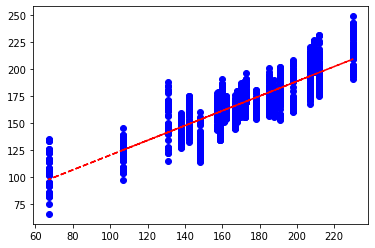

In [41]:
plt.scatter(y_test, pred, color="blue")
z=np.polyfit(y_test, pred,1)
p=np.poly1d(z)
plt.plot(y_test, p(y_test),"r--")
plt.show()

In [43]:
from sklearn.model_selection import cross_val_score

In [47]:
cv_results=cross_val_score(regressor,X_test,y_test)

In [50]:
cv_results.mean()

0.4311191652572167

In [45]:
pred[:10]


array([167.78877484, 170.953036  , 170.32633543, 173.49059659,
       176.65382639, 176.97538194, 174.79529206, 174.16962286,
       174.48602157, 176.08085058])

In [152]:
y_test[:10]

array([207, 207, 207, 207, 207, 207, 207, 207, 207, 207])

In [51]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 12.622046311026061
MSE: 269.93943296360203
RMSE: 16.429833625560608


In [167]:
# from sklearn.metrics import accuracy_score, confusion_matrix
# acc=accuracy_score(y_test.astype(float),pred)
# print("Accuracy Scoore:", acc)
# mt=confusion_matrix(y_test.astype(float),pred)
# print("Accuracy Scoore:", mt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


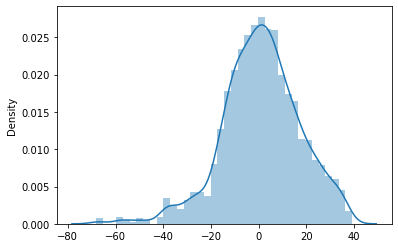

In [52]:
sns.distplot(y_test-pred)

## Ridge Regression

Penalizes large coefficients, regularized Regression

Alpha must not be large, if large larger coefficients get penalized, model becomes so simple-->underfitting

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [63]:
ridge=Ridge(alpha=0.1, normalize=True)

In [64]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [65]:
ridge_pred=ridge.predict(X_test)

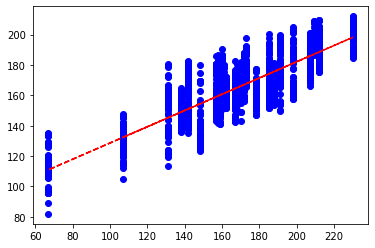

0.6505490784474883

In [66]:
plt.scatter(y_test, ridge_pred, color="blue")
z=np.polyfit(y_test, ridge_pred,1)
p=np.poly1d(z)
plt.plot(y_test, p(y_test),"r--")
plt.show()

ridge.score(X_test, y_test)

In [67]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [68]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-317.83655054367796


In [69]:
best_model=ridge_regressor.best_estimator_

In [70]:
best_model.fit(X_train, y_train)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [71]:
prediction=best_model.predict(X_test)

In [72]:
best_model.score(X_test,y_test)

0.7335544678887462

In [89]:
from sklearn.model_selection import cross_val_score
cv_=cross_val_score(best_model,X,y, cv=5)

In [91]:
cv_.mean()

0.6291119709853497

In [165]:
prediction[:10]

array([167.78725265, 170.95219659, 170.3249102 , 173.48985413,
       176.65336136, 176.9748509 , 174.79437838, 174.16852869,
       174.48283472, 176.07699941])

In [166]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.62231282722139
MSE: 269.9638564857352
RMSE: 16.43057687623095


In [92]:
import pickle
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

## Lasso

In [169]:
from sklearn.linear_model import Lasso

In [170]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4473946.543437475, tolerance: 2529.9556965945594
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4494099.465579851, tolerance: 2547.038071028663
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4679382.735425718, tolerance: 2667.8126904366486
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4325044.42

{'alpha': 0.01}
-317.83555814734297
